<a href="https://colab.research.google.com/github/renzotaco/IOIII/blob/main/Correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pingouin

     |████████████████████████████████| 182 kB 8.5 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 9.8 MB 40.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=e3dcb47cdf865c3f73b4788a0c07b5f936d686e8c9e9a485c397d93f26c533fd
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=9e8aa9491dc4517dc193c9296199ab0e0aaeaf2793cb1c6f9cdb7ed907e5f3ad
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)

# Se utilizan únicamente información de individuos mayores de 18 años.
datos = datos[datos.age > 18]

datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  346 non-null    float64
 1   weight  346 non-null    float64
 2   age     346 non-null    float64
 3   male    346 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 KB


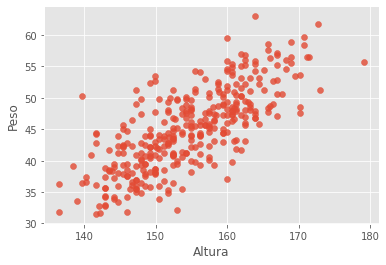

In [3]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.height, y=datos.weight, alpha= 0.8)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso');

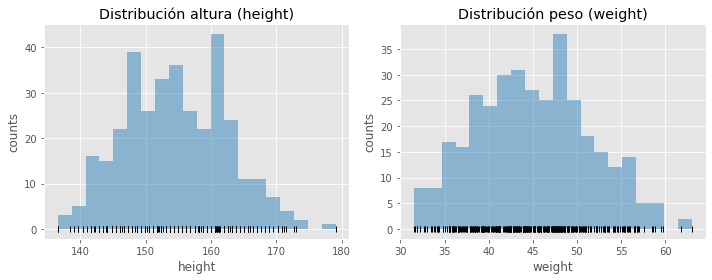

In [4]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=datos.height, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.height, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución altura (height)')
axs[0].set_xlabel('height')
axs[0].set_ylabel('counts')

axs[1].hist(x=datos.weight, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.weight, np.full_like(datos.weight, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución peso (weight)')
axs[1].set_xlabel('weight')
axs[1].set_ylabel('counts')


plt.tight_layout();

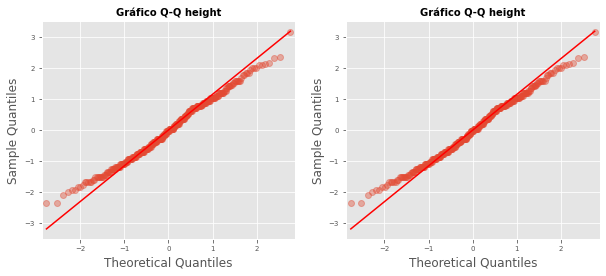

In [5]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [6]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos.height)
print(f"Variable height: {shapiro_test}")
shapiro_test = stats.shapiro(datos.weight)
print(f"Variable weight: {shapiro_test}")

Variable height: ShapiroResult(statistic=0.9910696148872375, pvalue=0.03439393267035484)
Variable weight: ShapiroResult(statistic=0.9911819696426392, pvalue=0.03673496097326279)


In [7]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos.height)
print(f"Variable height: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datos.weight)
print(f"Variable weight: Estadítico = {k2}, p-value = {p_value}")

Variable height: Estadítico = 7.210790495766356, p-value = 0.02717670115638557
Variable weight: Estadítico = 8.402628478646022, p-value = 0.014975881988445145


Variable height: ShapiroResult(statistic=0.9922674894332886, pvalue=0.06951289623975754)


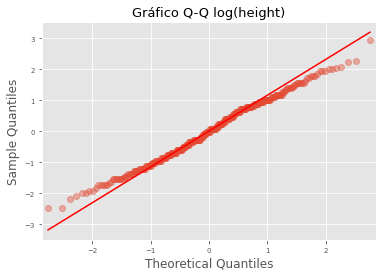

In [8]:
# Transformación logarítmica de los datos
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sm.qqplot(
    np.log(datos.height),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q log(height)', fontsize = 13)
ax.tick_params(labelsize = 7)


shapiro_test = stats.shapiro(np.log(datos.height))
print(f"Variable height: {shapiro_test}")

In [9]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', datos['weight'].corr(datos['height'], method='pearson'))
print('Correlación spearman: ', datos['weight'].corr(datos['height'], method='spearman'))
print('Correlación kendall: ', datos['weight'].corr(datos['height'], method='kendall'))

Correlación Pearson:  0.7528177220327672
Correlación spearman:  0.7510966609219974
Correlación kendall:  0.5639709660523899


In [10]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(datos['weight'], datos['height'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(datos['weight'], datos['height'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(datos['weight'], datos['height'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.7528177220327671, p-value=1.894103779417439e-64
Correlación Spearman: r=0.7510966609219974, p-value=5.2882247217804375e-64
Correlación Pearson: r=0.5639709660523899, p-value=3.162649137764771e-54


In [11]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(datos['weight'], datos['height'], method='pearson'))
display(pg.corr(datos['weight'], datos['height'], method='spearman'))
display(pg.corr(datos['weight'], datos['height'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,346,0.752818,"[0.7, 0.8]",1.894104e-64,8.84e+60,1.0


,n,r,CI95%,p-val,power
spearman,346,0.751097,"[0.7, 0.79]",5.288225e-64,1.0


,n,r,CI95%,p-val,power
kendall,346,0.563971,"[0.49, 0.63]",3.162649e-54,1.0
